## Домашнее задание "Теория оптимизации."

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import differential_evolution

### **Задание**
При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма: strategy, maxiter, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

#### **Допзадание**
Найти множество параметров (strategy=..., maxiter=..., ..., updating=...), которые требуют минимального количества итераций.

[Генетические алгоритмы, Differentional evolution](https://www.youtube.com/watch?v=iJq72kjahQo)  
Кроме лекций послушал ещё вот этот ролик, чтобы понять 'на пальцах, и сложно'.

[scipy.optimize.differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html)  
Описание метода на SciPy.org с пояснениями параметров.

Можно использовать следующий код:

In [26]:
?differential_evolution

In [3]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

**strategy** : str, optional  

The differential evolution strategy to use. Should be one of:  

‘best1bin’  
‘best1exp’  
‘rand1exp’
‘randtobest1exp’  
‘best2exp’  
‘rand2exp’  
‘randtobest1bin’  
‘best2bin’  
‘rand2bin’  
‘rand1bin’  
The default is ‘best1bin’.

**result.nit - показывает число итераций (number of iterations)**

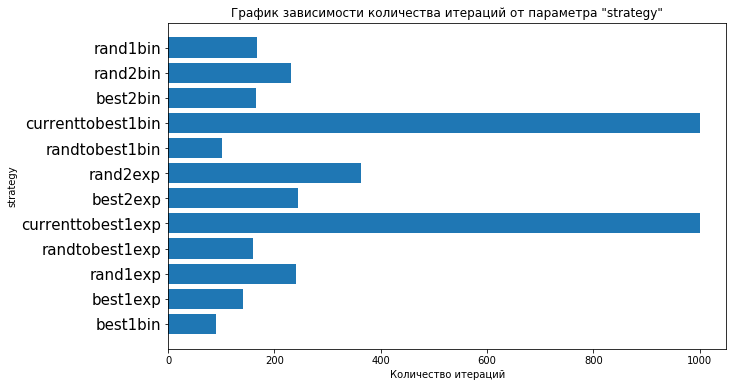

In [33]:
strat = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 
         'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']
res = []
for st in strat:
    result = differential_evolution(ackley, bounds, seed=42, strategy = st)
    res.append(result.nit)
labels = strat
value = res
position = np.arange(len(strat))

fig, ax = plt.subplots()
ax.barh(position, value)
ax.set_title('График зависимости количества итераций от параметра "strategy"')
ax.set_yticks(position)
ax.set_yticklabels(labels,
                   fontsize = 15)
ax.set_xlabel('Количествo итераций')
ax.set_ylabel('strategy')
fig.set_figwidth(10)
fig.set_figheight(6)

plt.show()

In [34]:
res

[90, 140, 241, 160, 1000, 244, 363, 101, 1000, 166, 232, 168]

In [35]:
min(res)

90

In [40]:
ind = res.index(min(res))
ind

0

In [39]:
strat [ind]

'best1bin'

In [25]:
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 5133
     nit: 168
 success: True
       x: array([0., 0.])

**maxiter** : int, optional

The maximum number of times the entire population is evolved. The maximum number of function evaluations is: maxiter * popsize * len(x)

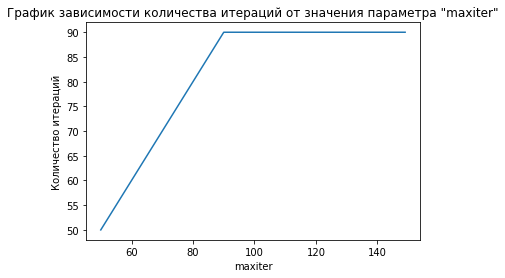

In [46]:
res = []
maxiter_it = range(50, 150, 1)
for i in maxiter_it:
    result = differential_evolution(ackley, bounds, seed=42, maxiter = i)
    res.append(result.nit)
fig, ax = plt.subplots()
ax.set_title('График зависимости количества итераций от значения параметра "maxiter"')
ax.set_xlabel('maxiter')
ax.set_ylabel('Количествo итераций')
plt.plot(maxiter_it, res)

In [47]:
ind = res.index(min(res))
ind

0

In [48]:
maxiter_it [ind]

50

**popsize** : int, optional  

A multiplier for setting the total population size. The population has popsize * len(x) individuals.

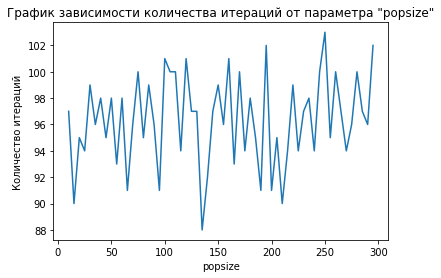

In [60]:
res = []
popsize_it = range(10, 300, 5)
for i in popsize_it:
    result = differential_evolution(ackley, bounds, seed=42, popsize = i)
    res.append(result.nit)
fig, ax = plt.subplots()
ax.set_title('График зависимости количества итераций от параметра "popsize"')
ax.set_xlabel('popsize')
ax.set_ylabel('Количествo итераций')
plt.plot(popsize_it, res)

In [65]:
res

[97,
 90,
 95,
 94,
 99,
 96,
 98,
 95,
 98,
 93,
 98,
 91,
 96,
 100,
 95,
 99,
 96,
 91,
 101,
 100,
 100,
 94,
 101,
 97,
 97,
 88,
 92,
 97,
 99,
 96,
 101,
 93,
 100,
 94,
 98,
 95,
 91,
 102,
 91,
 95,
 90,
 94,
 99,
 94,
 97,
 98,
 94,
 100,
 103,
 95,
 100,
 97,
 94,
 96,
 100,
 97,
 96,
 102]

In [62]:
ind = res.index(min(res))
ind

25

In [63]:
popsize_it [ind]

135

**tol** : float, optional

When the mean of the population energies, multiplied by tol, divided by the standard deviation of the population energies is greater than 1 the solving process terminates: convergence = mean(pop) * tol / stdev(pop) > 1

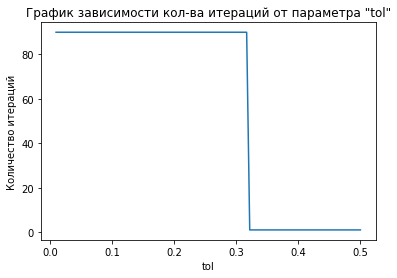

In [59]:
res = []
tol_it = np.linspace(.01, 0.5, 100)
for i in tol_it:
    result = differential_evolution(ackley, bounds, seed=42, tol = i)
    res.append(result.nit)
fig, ax = plt.subplots()
ax.set_title('График зависимости кол-ва итераций от параметра "tol"')
ax.set_xlabel('tol')
ax.set_ylabel('Количествo итераций')
plt.plot(tol_it, res)

**mutation** : float or tuple(float, float), optional

The mutation constant. If specified as a float it should be in the range [0, 2]. If specified as a tuple (min, max) dithering is employed. Dithering randomly changes the mutation constant on a generation by generation basis. The mutation constant for that generation is taken from U[min, max). Dithering can help speed convergence significantly. Increasing the mutation constant increases the search radius, but will slow down convergence.

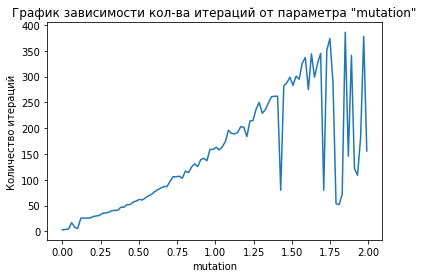

In [14]:
res = []
mutation_it = np.linspace(0.0, 1.99, 100)
for i in mutation_it:
    result = differential_evolution(ackley, bounds, seed=42, mutation = i)
    res.append(result.nit)
fig, ax = plt.subplots()
ax.set_title('График зависимости кол-ва итераций от параметра "mutation"')
ax.set_xlabel('mutation')
ax.set_ylabel('Количествo итераций')
plt.plot(mutation_it, res)

**recombination** : float, optional

The recombination constant, should be in the range [0, 1]. Increasing this value allows a larger number of mutants to progress into the next generation, but at the risk of population stability.

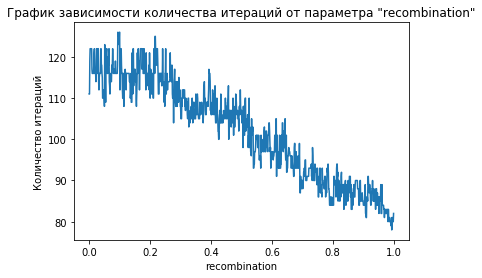

In [71]:
res = []
recombination_it = np.linspace(0.0, 1.0, 1000)
for i in recombination_it:
    result = differential_evolution(ackley, bounds, seed=42, recombination = i)
    res.append(result.nit)
fig, ax = plt.subplots()
ax.set_title('График зависимости количества итераций от параметра "recombination"')
ax.set_xlabel('recombination')
ax.set_ylabel('Количествo итераций')
plt.plot(recombination_it, res)

In [72]:
ind = res.index(min(res))
ind

993

In [73]:
recombination_it [ind]

0.993993993993994

**updating** : {'immediate', 'deferred'}, optional  
    If ``'immediate'``, the best solution vector is continuously updated
    within a single generation [4]_. This can lead to faster convergence as
    trial vectors can take advantage of continuous improvements in the best
    solution.
    With ``'deferred'``, the best solution vector is updated once per
    generation. Only ``'deferred'`` is compatible with parallelization, and
    the `workers` keyword can over-ride this option.

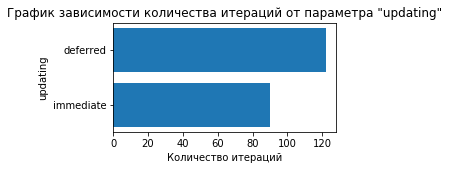

In [66]:
strat = ['immediate', 'deferred', ]
res = []
for st in strat:
    result = differential_evolution(ackley, bounds, seed=42, updating = st)
    res.append(result.nit)
labels = strat
value = res
position = np.arange(len(strat))

fig, ax = plt.subplots()
ax.barh(position, value)
ax.set_yticks(position)
ax.set_yticklabels(labels,
                   fontsize = 10)
ax.set_title('График зависимости количества итераций от параметра "updating"')
ax.set_xlabel('Количествo итераций')
ax.set_ylabel('updating')
fig.set_figwidth(4)
fig.set_figheight(2)

plt.show()

In [67]:
ind = res.index(min(res))
ind

0

In [68]:
strat[0]

'immediate'